# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhamad Nanda Diaztomo
- **Email:** ndiaztom@gmail.com
- **ID Dicoding:** diazfrezen56

## Menentukan Pertanyaan Bisnis

- Bagaimana pola dan perbedaan jumlah peminjaman sepeda berdasarkan musim, kondisi cuaca, suhu, waktu, dan jenis hari pada periode 2011–2012?
- Bagaimana tren peminjaman sepeda dari tahun 2011 sampai 2012?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_bike = pd.read_csv('https://drive.usercontent.google.com/download?id=18NXyQM4BhGnnePpMK39yU5YkRw_KsJ9V&export=download&authuser=0&confirm=t&uuid=5b92b349-7fd8-43c3-83a6-8a6acf97b686&at=APcXIO2MJ12NiyBfCMkizKzq-7xw:1771957499792')
hour_bike = pd.read_csv('https://drive.usercontent.google.com/download?id=1sK7VCZDMmN1MDp05HFVqtyb3RGlARWEf&export=download&authuser=0&confirm=t&uuid=c89507b5-c87d-4601-bfdc-d7e27cfcbb36&at=APcXIO0ISEf4qQKqEFuQP2lQKfsU:1771957463129')

display(day_bike.head())
display(hour_bike.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day_bike adalah data peminjaman sepeda dengan jeda waktu hari. Data ini cocok untuk melihat angka peminjaman sepeda dari hari ke hari pada baik pada hari kerja, libur, dan pergantian musim.   
- hour_bike adalah data peminjaman sepeda degan jeda waktu jam. Data ini cocok untuk melihat angka peminjaman sepeda pada jam-jam tertentu, seperti saat jam sibuk ataupun pada tiap pembagian waktu seperti pagi, siang, sore, dan malam.

### Assessing Data

In [ ]:
print("Tabel Deskriptif Data Harian Peminjaman Sepeda:")
display(day_bike.describe(include='all').T)
print("Tabel Jumlah Data yang Hilang di Data Harian Peminjaman Sepeda:")
display(day_bike.isna().sum())
print("Jumlah duplikat:",day_bike.duplicated().sum())
print("Ringkasan Data Harian Peminjaman Sepeda")
display(day_bike.info())


Tabel Deskriptif Data Harian Peminjaman Sepeda:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,731.0,NaN,NaN,NaN,366.0,211.165812,1.0,183.5,366.0,548.5,731.0
dteday,731,731,2012-12-31,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaN,NaN,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,NaN,NaN,NaN,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaN,NaN,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaN,NaN,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaN,NaN,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaN,NaN,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667


Tabel Jumlah Data yang Hilang di Data Harian Peminjaman Sepeda:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Jumlah duplikat: 0
Ringkasan Data Harian Peminjaman Sepeda
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


None

#### Assesing data meliputi mengecek data hilang, duplikat, kejelasan nilai, serta kesesuaian tipe data pada kedua data.

In [ ]:
print("Tabel Deskriptif Data Tiap Jam Peminjaman Sepeda:")
display(hour_bike.describe(include='all').T)
print("Tabel Jumlah Data yang Hilang di Data Tiap Jam Peminjaman Sepeda:")
display(hour_bike.isna().sum())
print("Jumlah duplikat:",hour_bike.duplicated().sum())
print("Ringkasan Data Tiap Jam Peminjaman Sepeda")
display(hour_bike.info())

Tabel Deskriptif Data Tiap Jam Peminjaman Sepeda:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,17379.0,NaN,NaN,NaN,8690.0,5017.0295,1.0,4345.5,8690.0,13034.5,17379.0
dteday,17379,731,2012-12-31,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379.0,NaN,NaN,NaN,2.50164,1.106918,1.0,2.0,3.0,3.0,4.0
yr,17379.0,NaN,NaN,NaN,0.502561,0.500008,0.0,0.0,1.0,1.0,1.0
mnth,17379.0,NaN,NaN,NaN,6.537775,3.438776,1.0,4.0,7.0,10.0,12.0
hr,17379.0,NaN,NaN,NaN,11.546752,6.914405,0.0,6.0,12.0,18.0,23.0
holiday,17379.0,NaN,NaN,NaN,0.02877,0.167165,0.0,0.0,0.0,0.0,1.0
weekday,17379.0,NaN,NaN,NaN,3.003683,2.005771,0.0,1.0,3.0,5.0,6.0
workingday,17379.0,NaN,NaN,NaN,0.682721,0.465431,0.0,0.0,1.0,1.0,1.0
weathersit,17379.0,NaN,NaN,NaN,1.425283,0.639357,1.0,1.0,1.0,2.0,4.0


Tabel Jumlah Data yang Hilang di Data Tiap Jam Peminjaman Sepeda:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Jumlah duplikat: 0
Ringkasan Data Tiap Jam Peminjaman Sepeda
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usa

None

**Insight:**
- Tidak ditemukan adanya *missing value* dan nilai duplikat pada tiap dataset, maka tidak perlu adanya filling missing value ataupun drop data duplikat.
- Drop kolom instant(id), perbaikan beberapa tipe data feature menjadi kategorik (season, yr, mnth, holiday, weekday, workingday, weathersit), dan dteday menjadi datetime
- kolom temp, atemp, hum, windspeed yang sudah di-normalized akan diubah kebentuk nilai asalnya agar maknanya mudah dimengerti (nilai min dan max berdasarkan: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset).
- Drop kolom temepratur di day_bike karena kurang bermakna (tmax dan tmin tidak diketahui)


### Cleaning Data

In [ ]:
day_bike.drop("instant",axis=1,inplace=True)

day_bike['season'] = day_bike['season'].map({
                    1:'winter',
                    2:'spring',
                    3:'summer',
                    4:'fall'
})
day_bike['season'] = pd.Categorical(day_bike['season'],
                    categories=['winter','spring','summer','fall'], ordered=True)

day_bike['yr'] = day_bike['yr'].map({
                  0:'2011',
                  1:'2012'
})

day_bike['yr'] = pd.Categorical(day_bike['yr'],
                    categories=['2011','2012'], ordered=True)

day_bike['mnth'] = day_bike['mnth'].map({
                  1:"january",2:"february",3:"march",4:"april",
                  5:"may",6:"june",7:"july",8:"august",
                  9:"september",10:"october",11:"november",12:"december"
})
day_bike['mnth'] = pd.Categorical(day_bike['mnth'],
                    categories=["january","february","march","april",
                                "may","june","july","august","september",
                                "october","november","december"], ordered=True)


day_bike['holiday'] = day_bike['holiday'].map({0:'No',1:'Yes'})
day_bike['holiday'] = day_bike['holiday'].astype('category')


day_bike['weekday'] = day_bike['weekday'].map({0:"Sunday",1:"Monday",
                                               2:"Tuesday",3:"Wednesday",
                                               4:"Thursday",5:"Friday",6:"Saturday"})
day_bike['weekday'] = pd.Categorical(day_bike['weekday'],
                    categories=["Monday","Tuesday","Wednesday",
                                "Thursday","Friday","Saturday","Sunday"], ordered=True)


day_bike['workingday'] = day_bike['workingday'].map({0:'No',1:'Yes'})
day_bike['workingday'] = day_bike['workingday'].astype('category')

day_bike['weathersit'] = day_bike['weathersit'].map({1:'clear',2:'cloudy',
                                                     3:'light rain/snow',
                                                     4:'heavy rain/snow'})
day_bike['weathersit'] = pd.Categorical(day_bike['weathersit'],
                    categories=["clear","cloudy","light rain/snow",
                                "heavy rain/snow"], ordered=True)

day_bike['dteday'] = pd.to_datetime(day_bike['dteday'])
day_bike['hum'] = day_bike['hum']*100
day_bike['windspeed'] = day_bike['windspeed']*67
day_bike['atemp'] = day_bike['atemp']*50
day_bike['temp'] = day_bike['temp']*41

In [ ]:
day_bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,winter,2011,january,No,Saturday,No,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,winter,2011,january,No,Sunday,No,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,winter,2011,january,No,Monday,Yes,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,winter,2011,january,No,Tuesday,Yes,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,winter,2011,january,No,Wednesday,Yes,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
day_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 52.3

In [ ]:
hour_bike.drop("instant",axis=1,inplace=True)

hour_bike['season'] = hour_bike['season'].map({
                    1:'winter',
                    2:'spring',
                    3:'summer',
                    4:'fall'
})
hour_bike['season'] = pd.Categorical(hour_bike['season'],
                    categories=['winter','spring','summer','fall'], ordered=True)

hour_bike['yr'] = hour_bike['yr'].map({
                  0:'2011',
                  1:'2012'
})

hour_bike['yr'] = pd.Categorical(hour_bike['yr'],
                    categories=['2011','2012'], ordered=True)

hour_bike['mnth'] = hour_bike['mnth'].map({
                  1:"january",2:"february",3:"march",4:"april",
                  5:"may",6:"june",7:"july",8:"august",
                  9:"september",10:"october",11:"november",12:"december"
})
hour_bike['mnth'] = pd.Categorical(hour_bike['mnth'],
                    categories=["january","february","march","april",
                                "may","june","july","august","september",
                                "october","november","december"], ordered=True)


hour_bike['holiday'] = hour_bike['holiday'].map({0:'No',1:'Yes'})
hour_bike['holiday'] = hour_bike['holiday'].astype('category')


hour_bike['weekday'] = hour_bike['weekday'].map({0:"Sunday",1:"Monday",
                                               2:"Tuesday",3:"Wednesday",
                                               4:"Thursday",5:"Friday",6:"Saturday"})
hour_bike['weekday'] = pd.Categorical(hour_bike['weekday'],
                    categories=["Sunday","Monday","Tuesday","Wednesday",
                                "Thursday","Friday","Saturday"], ordered=True)


hour_bike['workingday'] = hour_bike['workingday'].map({0:'Rest',1:'Work'})
hour_bike['workingday'] = hour_bike['workingday'].astype('category')

hour_bike['weathersit'] = hour_bike['weathersit'].map({1:'clear',2:'cloudy',
                                                     3:'light rain/snow',
                                                     4:'heavy rain/snow'})
hour_bike['weathersit'] = pd.Categorical(hour_bike['weathersit'],
                    categories=["clear","cloudy","light rain/snow",
                                "heavy rain/snow"], ordered=True)

hour_bike['temp'] = hour_bike['temp']*(39-(-8)) - 8
hour_bike['atemp'] = hour_bike['atemp']*(50-(-16)) - 16

hour_bike['hum'] = hour_bike['hum']*100
hour_bike['windspeed'] = hour_bike['windspeed']*67

hour_bike['dteday'] = pd.to_datetime(hour_bike['dteday'])
hour_bike['dteday'] = hour_bike['dteday'] + pd.to_timedelta(hour_bike['hr'],unit='h')
hour_bike.rename(columns={'dteday': 'timestamp'}, inplace=True)

hour_bike['day'] = np.where(
    (hour_bike["hr"] >= 6) & (hour_bike["hr"] < 18),
    "day",
    "night"
)

In [ ]:
hour_bike.head()

,timestamp,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,2011-01-01 00:00:00,winter,2011,january,0,No,Saturday,Rest,clear,3.28,3.0014,81.0,0.0,3,13,16,night
1,2011-01-01 01:00:00,winter,2011,january,1,No,Saturday,Rest,clear,2.34,1.9982,80.0,0.0,8,32,40,night
2,2011-01-01 02:00:00,winter,2011,january,2,No,Saturday,Rest,clear,2.34,1.9982,80.0,0.0,5,27,32,night
3,2011-01-01 03:00:00,winter,2011,january,3,No,Saturday,Rest,clear,3.28,3.0014,75.0,0.0,3,10,13,night
4,2011-01-01 04:00:00,winter,2011,january,4,No,Saturday,Rest,clear,3.28,3.0014,75.0,0.0,0,1,1,night


In [ ]:
hour_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  category      
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
 16  day         17379 non-

Binning kolom temp, hum, dan windspeed untuk visualisasi.

In [ ]:
df_cat = pd.DataFrame()

kolom_numerik = ["temp","hum","windspeed"]
for cat in kolom_numerik:
  min_ = day_bike[cat].min()
  max_ = day_bike[cat].max()
  range_bin = (max_ - min_)/5
  df_cat[cat] = pd.cut(day_bike[cat],
                bins=[round(min_ + i*range_bin,1) for i in range(6)],
                labels=[str(round(min_ + i*range_bin,1))+"-"+str(round(min_ + (i+1)*range_bin,1)) for i in range(5)])

df_cat["cnt"] = day_bike["cnt"]
df_cat.head()

,temp,hum,windspeed,cnt
0,9.0-15.6,77.8-97.2,8.0-14.5,985
1,9.0-15.6,58.3-77.8,14.5-21.0,801
2,2.4-9.0,38.9-58.3,14.5-21.0,1349
3,2.4-9.0,58.3-77.8,8.0-14.5,1562
4,9.0-15.6,38.9-58.3,8.0-14.5,1600


**Insight:**
- Kedua data sudah dibersihkan untuk dieksplorasi untuk melihat asosiasi dengan variabel kategorik ataupun korelasinya dengan variabel kontinu dengan jumlah peminjam sepeda.
- Eksplorasi data akan mudah terlihat dengan

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
day_bike.describe(include='all')

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,summer,2012,january,No,Monday,Yes,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
hour_bike.describe(include='all')

,timestamp,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,summer,2012,july,NaN,No,Saturday,Work,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,day
freq,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8735
mean,2012-01-02 15:41:22.858622464,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,15.358397,15.401157,62.722884,12.736540,35.676218,153.786869,189.463088,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,-7.060000,-16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,2011-07-04 22:30:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,7.980000,5.997800,48.000000,7.001500,4.000000,34.000000,40.000000,NaN
50%,2012-01-02 21:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,15.500000,15.996800,63.000000,12.998000,17.000000,115.000000,142.000000,NaN
75%,2012-07-02 06:30:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,23.020000,24.999200,78.000000,16.997900,48.000000,220.000000,281.000000,NaN
max,2012-12-31 23:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,39.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000,NaN


In [ ]:
df_cat.groupby(by="temp").agg({
    "cnt" : ["max", "min", "mean", "std","sum","count"]
})

/tmp/ipython-input-682/2781742895.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cat.groupby(by="temp").agg({


cnt                                               
            max   min         mean          std      sum count
temp                                                          
2.4-9.0    3292   431  1571.162791   639.777005    67560    43
9.0-15.6   5992   441  3152.015464  1391.392241   611491   194
15.6-22.2  8090    22  4604.885714  1714.544639   805855   175
22.2-28.7  8714  1115  5669.268421  1571.838474  1077161   190
28.7-35.3  8173  3285  5670.093750  1291.505783   725772   128

In [ ]:
df_cat.groupby(by="hum").agg({
    "cnt" : ["max", "min", "mean", "std","sum","count"]
})

/tmp/ipython-input-682/1687193047.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cat.groupby(by="hum").agg({


cnt                                               
            max   min         mean          std      sum count
hum                                                           
0.0-19.4   1635  1635  1635.000000          NaN     1635     1
19.4-38.9  7442  1685  4539.380952  2027.265313    95327    21
38.9-58.3  8714   822  4562.101504  2008.135822  1213519   266
58.3-77.8  8395   431  4810.516418  1796.770527  1611523   335
77.8-97.2  7572    22  3468.462264  1790.477894   367657   106

In [ ]:
df_cat.groupby(by="windspeed").agg({
    "cnt" : ["max", "min", "mean", "std","sum","count"]
})

/tmp/ipython-input-682/1757174275.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cat.groupby(by="windspeed").agg({


cnt                                               
            max   min         mean          std      sum count
windspeed                                                     
1.5-8.0    8362   431  5050.912000  1886.080862   631364   125
8.0-14.5   8173   683  4678.582418  1833.786754  1703004   364
14.5-21.0  8714   506  4188.526882  1985.212991   779066   186
21.0-27.5  7442    22  3172.306122  1906.818753   155443    49
27.5-34.0  5382  1913  3694.500000  1269.999803    22167     6

In [ ]:
day_bike.groupby(by=["yr"]).agg({
    "casual": ["max", "min", "mean", "std","sum"],
    "registered" : ["max", "min", "mean", "std","sum"],
    "cnt" : ["max", "min", "mean", "std","sum"]
})

/tmp/ipython-input-682/3762505985.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_bike.groupby(by=["yr"]).agg({


casual                                      registered                    \
        max min         mean         std     sum        max  min         mean   
yr                                                                              
2011   3065   9   677.402740  556.269121  247252       4614  416  2728.358904   
2012   3410   2  1018.483607  758.989897  372765       6946   20  4581.450820   

                             cnt                                          
              std      sum   max  min         mean          std      sum  
yr                                                                        
2011  1060.110413   995851  6043  431  3405.761644  1378.753666  1243103  
2012  1424.331846  1676811  8714   22  5599.934426  1788.667868  2049576

In [ ]:
day_bike.groupby(by=["season","yr"]).agg({
    "cnt" : ["max", "min", "mean", "std","sum"]
})

/tmp/ipython-input-682/2564070948.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_bike.groupby(by=["season","yr"]).agg({


cnt                                        
              max   min         mean          std     sum
season yr                                                
winter 2011  3239   431  1666.666667   614.012663  150000
       2012  7836   441  3531.296703  1341.203270  321348
spring 2011  5805   795  3775.173913  1138.901028  347316
       2012  8362  1027  6209.489130  1221.345569  571273
summer 2011  6043  1115  4464.361702   798.348077  419650
       2012  8714  4073  6824.244681   912.756191  641479
fall   2011  5511   627  3664.460674   983.006128  326137
       2012  8555    22  5791.865169  1598.520901  515476

In [ ]:
day_bike.groupby(by=["holiday","workingday"]).agg({
    "cnt" : ["max", "min", "mean", "std","sum","count"]
})

/tmp/ipython-input-682/592088540.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_bike.groupby(by=["holiday","workingday"]).agg({


cnt                                                 
                       max     min         mean          std      sum count
holiday workingday                                                         
No      No          8714.0   605.0  4389.685714  2042.527458   921834   210
        Yes         8362.0    22.0  4584.820000  1878.415583  2292410   500
Yes     No          7403.0  1000.0  3735.000000  2103.350660    78435    21
        Yes            NaN     NaN          NaN          NaN        0     0

In [ ]:
day_bike.groupby(by="weathersit").agg({
    "cnt" : ["max", "min", "mean", "std","sum","count"]
})

/tmp/ipython-input-682/1206939978.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_bike.groupby(by="weathersit").agg({


cnt                                                
                    max    min         mean          std      sum count
weathersit                                                             
clear            8714.0  431.0  4876.786177  1879.483989  2257952   463
cloudy           8362.0  605.0  4035.862348  1809.109918   996858   247
light rain/snow  4639.0   22.0  1803.285714  1240.284449    37869    21
heavy rain/snow     NaN    NaN          NaN          NaN        0     0

In [ ]:
hour_bike.groupby(by='hr').agg({
    "cnt" : ["max", "min", "mean", "std","sum"]
})

cnt                                    
    max min        mean         std     sum
hr                                         
0   283   2   53.898072   42.307910   39130
1   168   1   33.375691   33.538727   24164
2   132   1   22.869930   26.578642   16352
3    79   1   11.727403   13.239190    8174
4    28   1    6.352941    4.143818    4428
5    66   1   19.889819   13.200765   14261
6   213   1   76.044138   55.084348   55132
7   596   1  212.064649  161.441936  154171
8   839   5  359.011004  235.189285  261001
9   426  14  219.309491   93.703458  159438
10  539   8  173.668501  102.205413  126257
11  663  10  208.143054  127.495536  151320
12  776   3  253.315934  145.081134  184414
13  760  11  253.661180  148.107657  184919
14  750  12  240.949246  147.271574  175652
15  750   7  251.233196  144.632541  183149
16  783  11  311.983562  148.682618  227748
17  976  15  461.452055  232.656611  336860
18  977  23  425.510989  224.639304  309772
19  743  11  311.523352  161.050359  226789
20  567  11  226.030220  119.670164  164550
21  584   6  172.314560   89.788893  125445
22  502   9  131.335165   69.937782   95612
23  256   2   87.831044   50.846889   63941

In [ ]:
hour_bike.groupby(by='day').agg({
    "cnt" : ["max", "min", "median", "std","sum"]
})

cnt                                
       max min median         std      sum
day                                       
day    976   1  213.0  178.477029  2200061
night  977   1   57.0  161.402580  1092618

**Melihat korelasi antara variabel numerik dengan jumlah peminjam sepeda (cnt):**

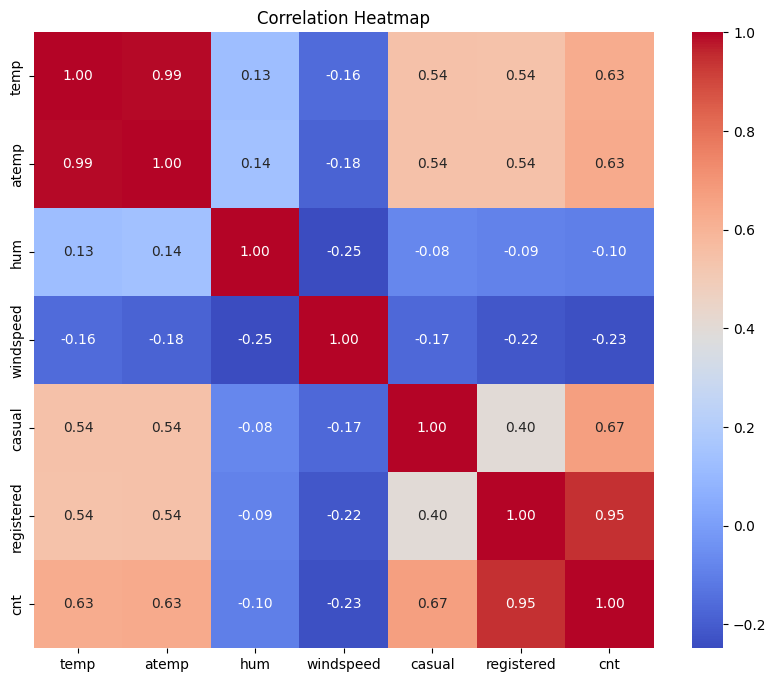

In [ ]:
corr_matrix = day_bike.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
)
plt.title("Correlation Heatmap")
plt.show()

**Melihat pola hubungan variabel numerik dengan jumlah peminjam sepeda:**

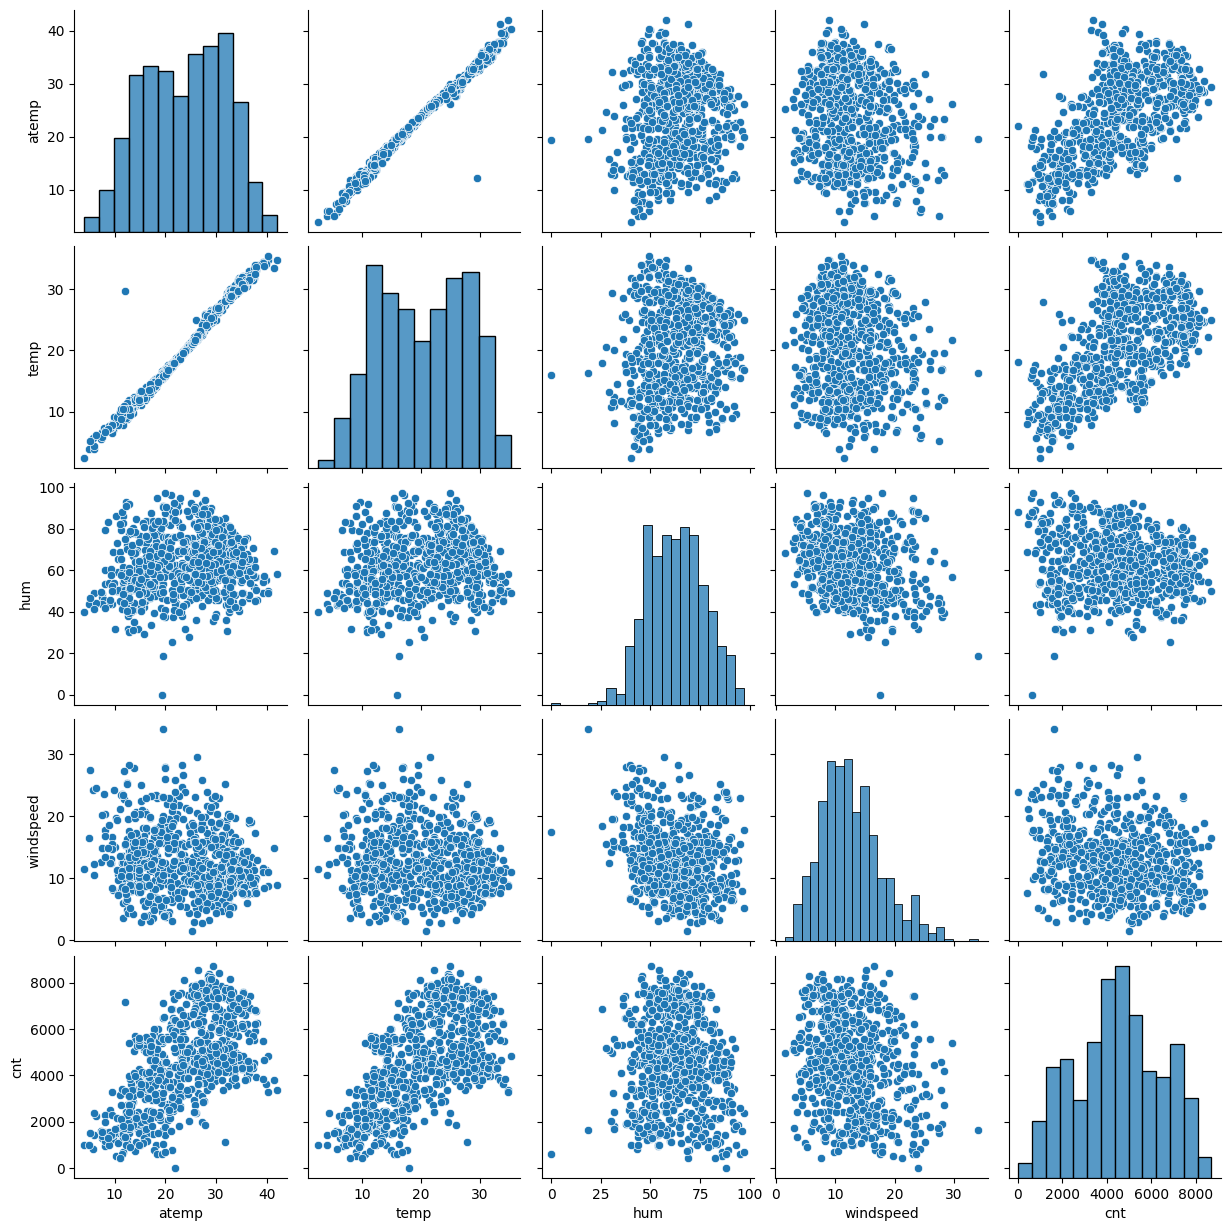

In [ ]:
sns.pairplot(day_bike[["atemp","temp", "hum", "windspeed", "cnt"]])
plt.show()

**Insight:**
- Ada sekitar **4505 (mean)** orang meminjam sepeda setiap harinya.
- Ada sekitar **142 (median)** orang meminjam sepeda setiap jam.
- Adanya **peningkatan jumlah peminjaman** sepeda dari **tahun 2011 (1.243.103 peminjam) ke 2012 (2.049.576 peminjam)**.
- Secara garis besar, peminjaman sepeda saat tinggi saat di **musim panas (summer)** dan sangat rendah saat **musim dingin (winter)** baik pada tahun 2011 maupun 2012.
- Peminjaman sepeda jauh **lebih tinggi saat weekend dan hari libur**.
- **Peminjaman sepeda yang tinggi (142>)** terjadi pada **jam 10 pagi hingga jam 11 malam**.
- Secara garis besar, **rata-rata peminjaman sepeda paling banyak terjadi pada siang hari (213)** dibandingkan pada saat malam (57).
- Pada heatmap, dapat diketahui bahwa **faktor suhu (temp), kelembapan (hum), dan kecepatan angin (windspeed) memiliki korelasi dengan jumlah peminjam sepeda (cnt)**. Faktor suhu memiliki nilai korelasi **sebesar 0.6, yaitu berkorelasi positif** dengan jumlah peminjam sepeda. Jadi **jumlah peminjam meningkat seiring dengan hangatnya suhu**. Sebaliknya, faktor **kelembapan dan kecepatan angin memiliki korelasi sebesar -0.10 dan -0.23**, yaitu berkorelasi negatif dengan jumlah peminjam sepeda. Artinya, **peminjaman sepeda akan berkurang jika terjadi peningkatan kelembapan**. Walaupun begitu, korelasi atau besar **hubungan keduanya relatif kecil (|value|<0.5)**.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola dan perbedaan jumlah peminjaman sepeda berdasarkan musim, kondisi cuaca, suhu, waktu, dan jenis hari pada periode 2011–2012?

**Melihat jumlah peminjaman sepeda berdasarkan temp, hum, windspeed:**

/tmp/ipython-input-682/2769307109.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_ = df_cat.groupby(by="temp").agg({


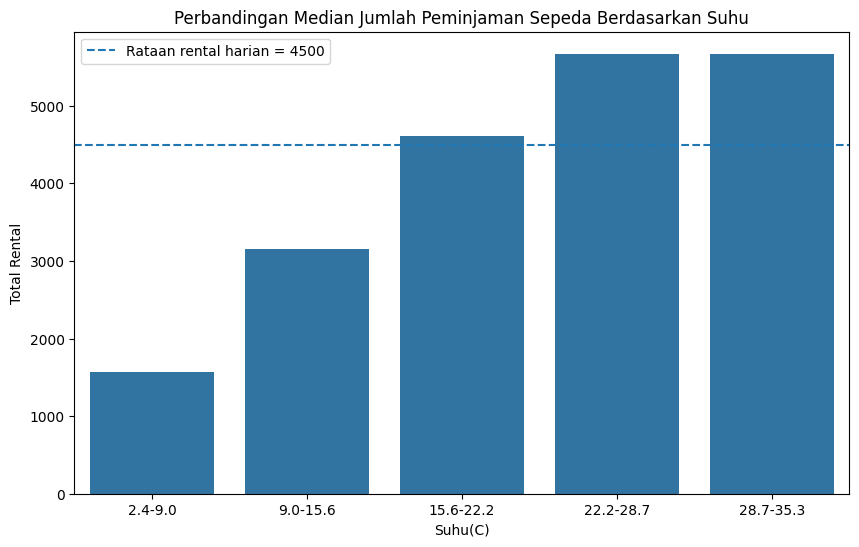

In [ ]:
temp_ = df_cat.groupby(by="temp").agg({
    "cnt" : "mean"
}).reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    data=temp_,
    x="temp",
    y="cnt",
)

plt.axhline(
    y=4500,
    linestyle='--',
    label="Rataan rental harian = 4500"
)
plt.legend()
plt.title("Perbandingan Median Jumlah Peminjaman Sepeda Berdasarkan Suhu")
plt.ylabel("Total Rental")
plt.xlabel("Suhu(C)")
plt.show()

/tmp/ipython-input-682/1786166759.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hum_ = df_cat.groupby(by="hum").agg({


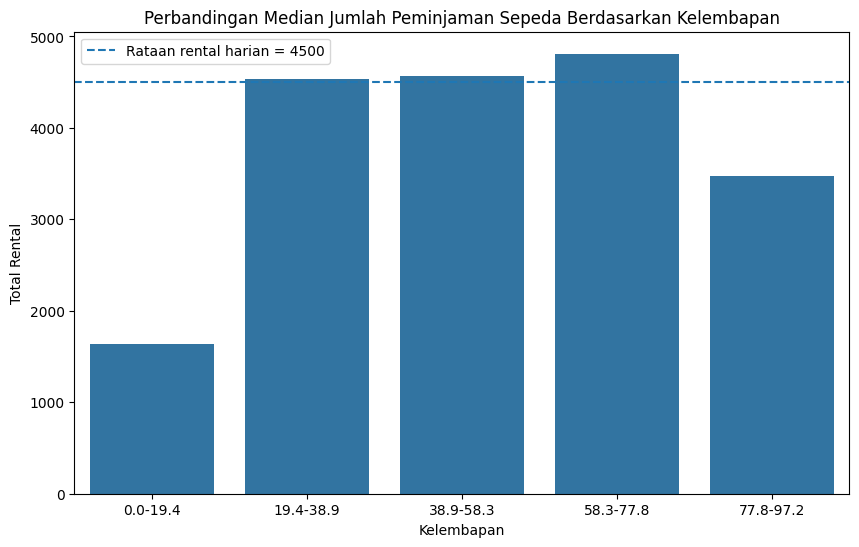

In [ ]:
hum_ = df_cat.groupby(by="hum").agg({
    "cnt" : "mean"
}).reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    data=hum_,
    x="hum",
    y="cnt",
)

plt.axhline(
    y=4500,
    linestyle='--',
    label="Rataan rental harian = 4500"
)
plt.legend()

plt.title("Perbandingan Median Jumlah Peminjaman Sepeda Berdasarkan Kelembapan")
plt.ylabel("Total Rental")
plt.xlabel("Kelembapan")
plt.show()

/tmp/ipython-input-682/4156580166.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  windspeed_ = df_cat.groupby(by="windspeed").agg({


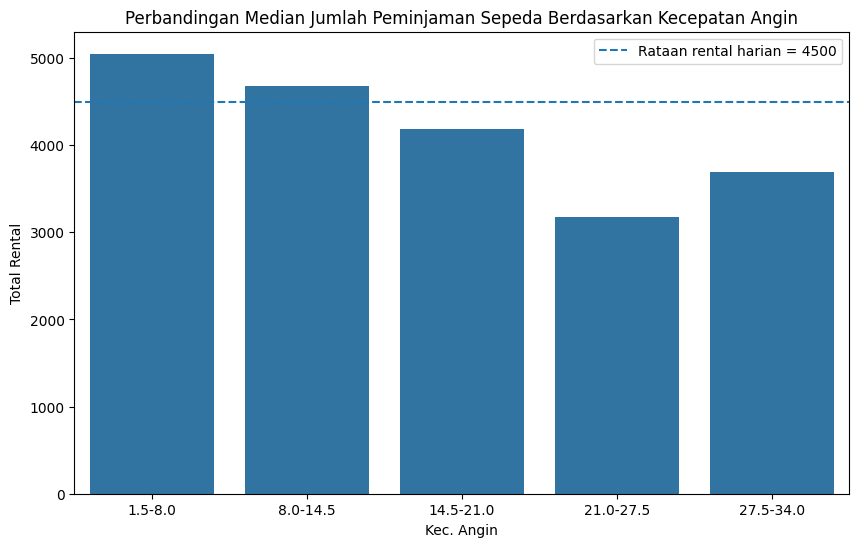

In [ ]:
windspeed_ = df_cat.groupby(by="windspeed").agg({
    "cnt" : "mean"
}).reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    data=windspeed_,
    x="windspeed",
    y="cnt",
)

plt.axhline(
    y=4500,
    linestyle='--',
    label="Rataan rental harian = 4500"
)
plt.legend()

plt.title("Perbandingan Median Jumlah Peminjaman Sepeda Berdasarkan Kecepatan Angin")
plt.ylabel("Total Rental")
plt.xlabel("Kec. Angin")
plt.show()

**Melihat jumlah peminjaman sepeda berdasarkan tahun dan musim:**

/tmp/ipython-input-682/2401605081.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season = day_bike.groupby(by=["yr","season"]).agg({


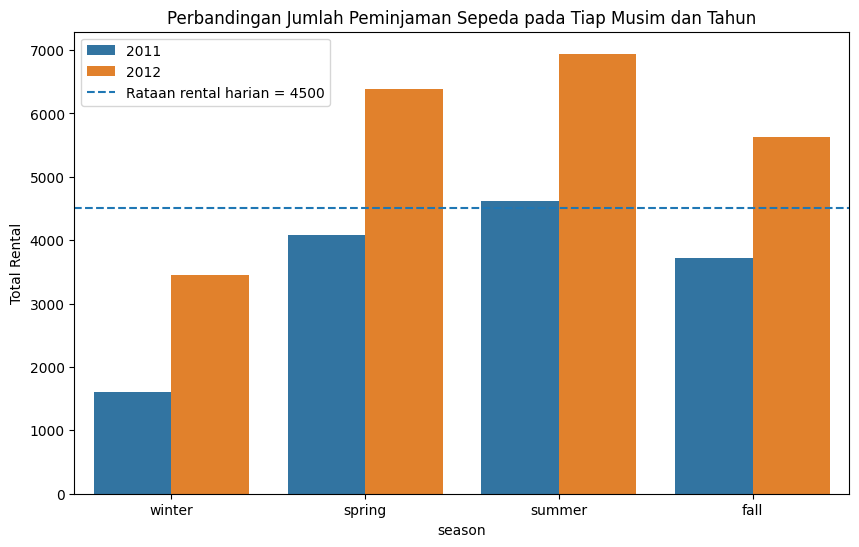

In [ ]:
season = day_bike.groupby(by=["yr","season"]).agg({
    "cnt" : "median"
}).reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    data=season,
    x="season",
    y="cnt",
    hue="yr"
)

plt.axhline(
    y=4500,
    linestyle='--',
    label="Rataan rental harian = 4500"
)
plt.legend()


plt.title("Perbandingan Jumlah Peminjaman Sepeda pada Tiap Musim dan Tahun")
plt.ylabel("Total Rental")
plt.show()

**Melihat jumlah peminjaman sepeda berdasarkan cuaca:**

/tmp/ipython-input-682/1985582779.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather = day_bike.groupby(by="weathersit").agg({


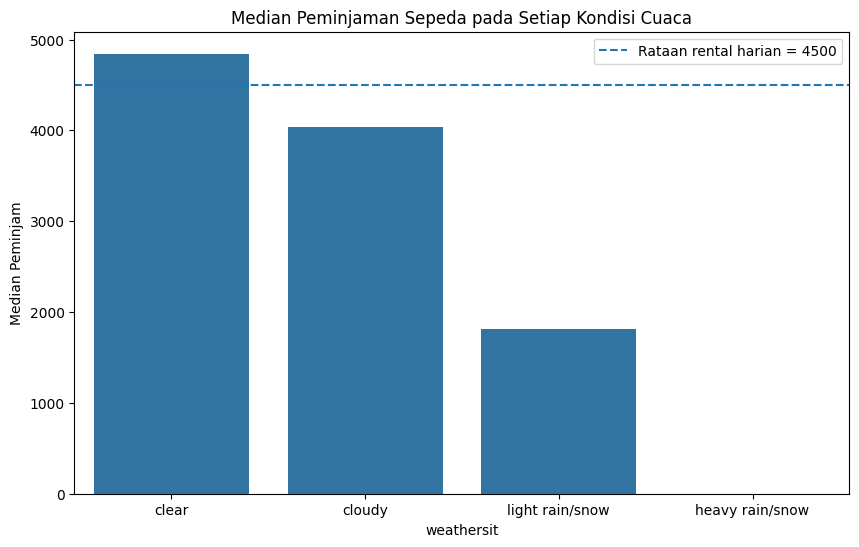

In [ ]:
weather = day_bike.groupby(by="weathersit").agg({
    "cnt" : "median"
}).reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    data=weather,
    x="weathersit",
    y="cnt"

)

plt.axhline(
    y=4500,
    linestyle='--',
    label="Rataan rental harian = 4500"
)
plt.legend()

plt.title("Median Peminjaman Sepeda pada Setiap Kondisi Cuaca")
plt.ylabel("Median Peminjam")
plt.show()

**Melihat jumlah peminjaman sepeda berdasarkan hari libur:**

/tmp/ipython-input-682/658076418.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_ = day_bike.groupby(by="holiday").agg({


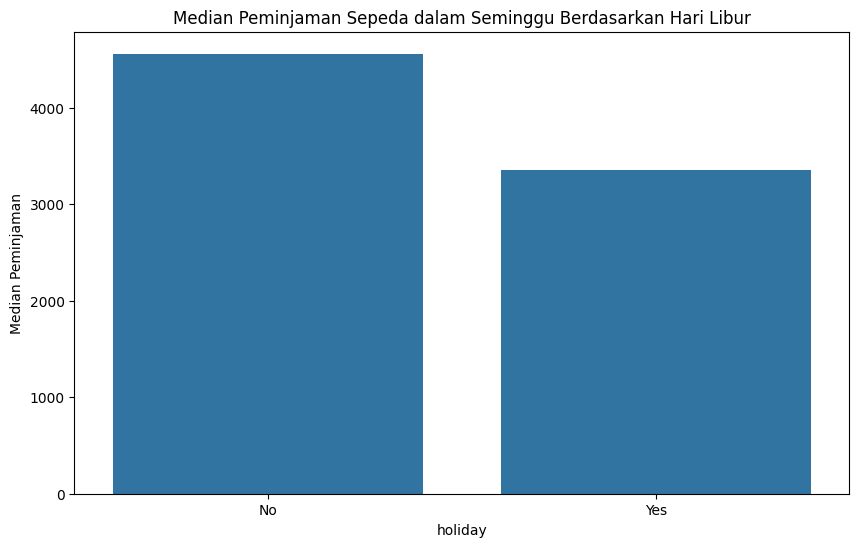

In [ ]:
holiday_ = day_bike.groupby(by="holiday").agg({
    "cnt" : "median"
}).reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    data=holiday_,
    x="holiday",
    y="cnt",

)

plt.title("Median Peminjaman Sepeda dalam Seminggu Berdasarkan Hari Libur")
plt.ylabel("Median Peminjaman")
plt.show()

/tmp/ipython-input-682/2517970814.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_h = day_bike.groupby(by=["holiday","weekday"]).agg({


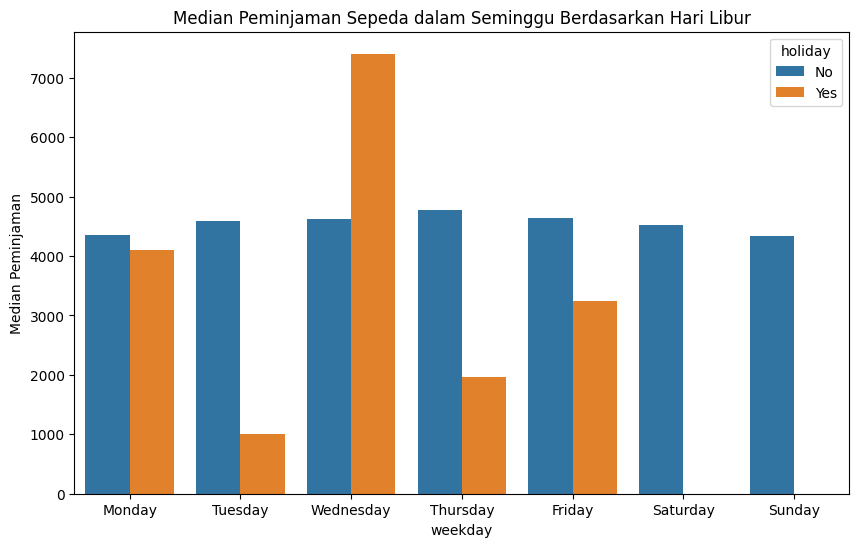

In [ ]:
weekday_h = day_bike.groupby(by=["holiday","weekday"]).agg({
    "cnt" : "median"
}).reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    data=weekday_h,
    x="weekday",
    y="cnt",
    hue="holiday"

)

plt.title("Median Peminjaman Sepeda dalam Seminggu Berdasarkan Hari Libur")
plt.ylabel("Median Peminjaman")
plt.show()

**Melihat jumlah peminjaman sepeda berdasarkan hari kerja:**

/tmp/ipython-input-682/2979352167.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_ = day_bike.groupby(by="workingday").agg({


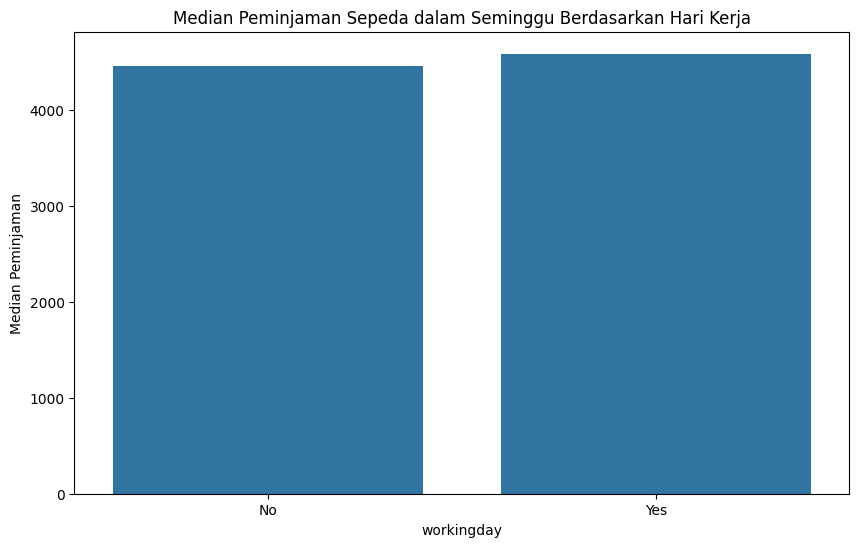

In [ ]:
workingday_ = day_bike.groupby(by="workingday").agg({
    "cnt" : "median"
}).reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    data=workingday_,
    x="workingday",
    y="cnt",

)

plt.title("Median Peminjaman Sepeda dalam Seminggu Berdasarkan Hari Kerja")
plt.ylabel("Median Peminjaman")
plt.show()

/tmp/ipython-input-682/2300026386.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_w = day_bike.groupby(by=["workingday","weekday"]).agg({


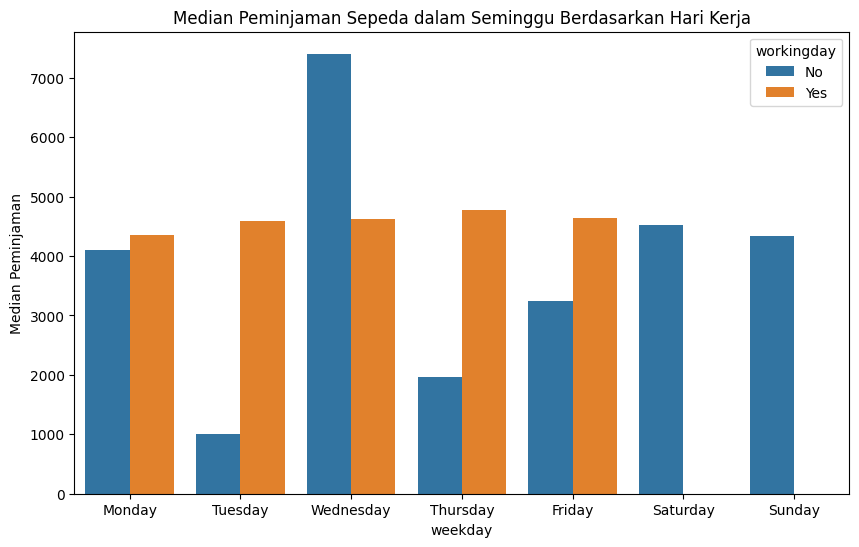

In [ ]:
weekday_w = day_bike.groupby(by=["workingday","weekday"]).agg({
    "cnt" : "median"
}).reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    data=weekday_w,
    x="weekday",
    y="cnt",
    hue="workingday"

)

plt.title("Median Peminjaman Sepeda dalam Seminggu Berdasarkan Hari Kerja")
plt.ylabel("Median Peminjaman")
plt.show()

**Melihat jumlah peminjaman sepeda berdasarkan jam:**

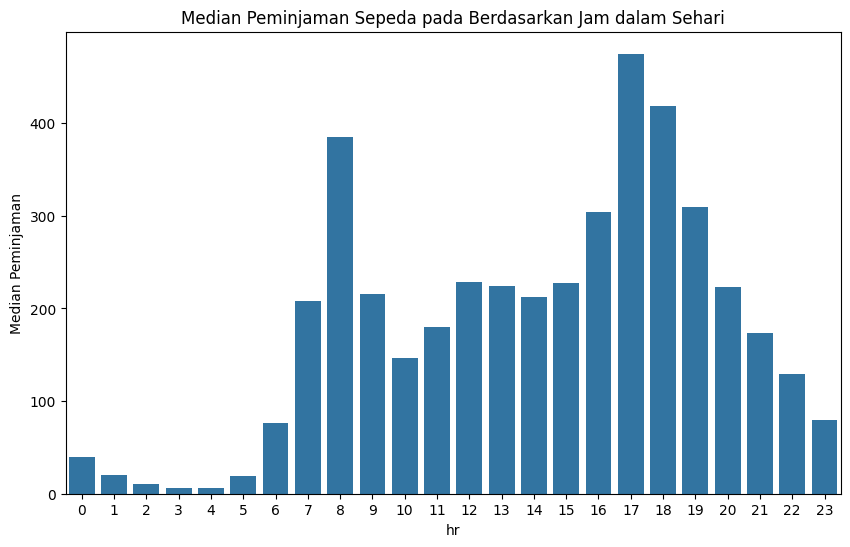

In [ ]:
hour = hour_bike.groupby(by="hr").agg({
    "cnt" : "median"
}).reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    data=hour,
    x="hr",
    y="cnt"

)

plt.title("Median Peminjaman Sepeda pada Berdasarkan Jam dalam Sehari")
plt.ylabel("Median Peminjaman")
plt.show()

**Melihat jumlah peminjaman sepeda berdasarkan pergantian hari:**

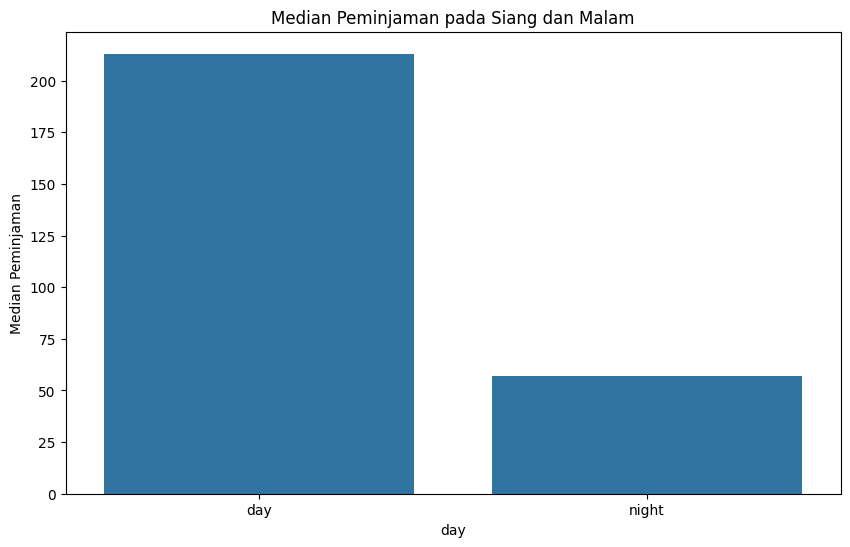

In [ ]:
day_night = hour_bike.groupby(by="day").agg({
    "cnt" : "median"
}).reset_index()

plt.figure(figsize=(10,6))

sns.barplot(
    data=day_night,
    x="day",
    y="cnt"

)

plt.title("Median Peminjaman pada Siang dan Malam")
plt.ylabel("Median Peminjaman")
plt.show()

### Pertanyaan 2: Bagaimana tren peminjaman sepeda dari tahun 2011 sampai 2012?

**Plot tren waktu peminjaman sepeda dari tahun 2011 sampai 2012:**

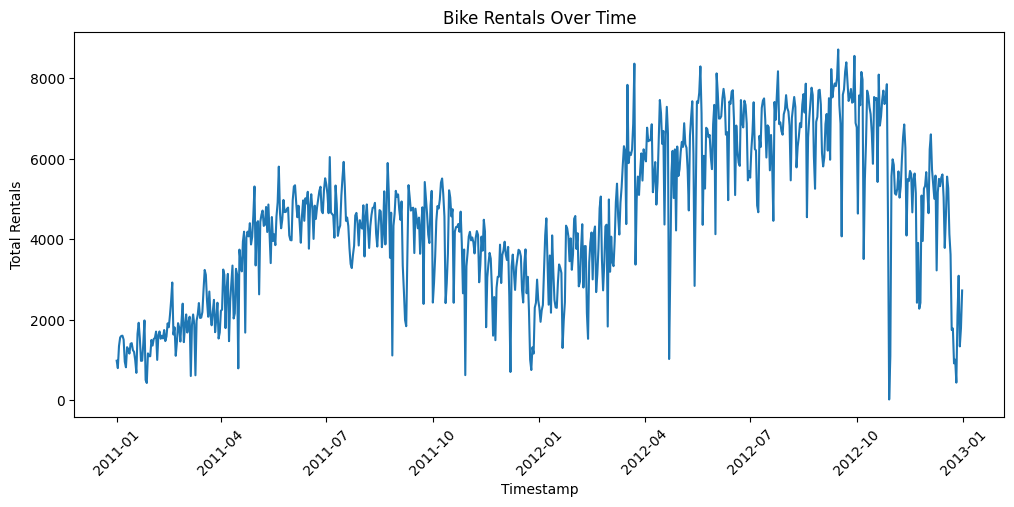

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(day_bike["dteday"], day_bike["cnt"])

plt.title("Bike Rentals Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Total Rentals")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Berdasarkan barplot binning variabel numerik, dapat dilihat bahwa faktor suhu berkaitan dengan jumlah peminjam sepeda. Terjadi peminjaman sepeda terbanyak (>5000) pada suhu yang hangat (28-35 C) ataupun sejuk (22-28 C). Sebaliknya, pada suhu dingan jumlah peminjaman sepeda relatif rendah, yaitu berkisar **kurang lebih 3000 peminjam (<rata-rata harian =4500)**. Pada barplot kecepatan angin, rata-rata peminjam  **berkurang dan di bawah rataan harian ketika kecepatan angin berada di atas 14.5**. Dapat diartikan kecepatan angin (windspeed) juga ikut memberi pengaruh dalam perilaku untuk menggunakan jasa peminjaman sepeda. Pada barplot kelembapan (hum), **jumlah peminjam relatif stabil pada rentang kelembapan 19-78**, walaupun **terjadi penurun yang drastis pada kelembapan yang sangat tinggi (78>) ataupun rendah (<19)**. Bisa dikatan kelembapan tidak terlalu berpengaruh terhadap jumlah peminjaman sepeda.
- Berdasarkan barplot-barplot di atas, diketahui bahwa jumlah peminjaman dalam suatu hari ataupun jam **dipengaruhi oleh musim, cuaca, hari libur, jam, dan pergantian hari (siang dan malam)**. **Musim semi dan panas memiliki jumlah peminjaman yang tinggi** dibandingkan kedua musim lainnya. Hal ini dapat disebabkan kedua musim tersebut lebih hangat dan cocok untuk menggunakan sepeda dibandingkan musim gugur dan salju. Pada kondisi cuaca, **Orang-orang cenderung meminjam sepeda pada cuaca cerah ataupun sedikit berawan**. Hanya sedikit orang yang menggunakan jasa peminjaman sepeda saat hujan atau turun salju ringan. Selain itu, Peminjaman sepeda tidak memiliki perbedaan yang signifikan berbeda pada setiap hari kerja, **tetapi memiliki jumlah peminjam yang beragam saat hari libur**. Terakhir, jumlah peminjaman sepeda dipengaruhi waktu dalam suatu hari. Peminjaman sepeda mengalami **kenaikan di jam sibuk yaitu mulai 10 (siang) sampai 18 (sore)** dan menurun ketika memasuki malam, yaitu aktifitas mulai meredah.
- Berdasarkan lineplot di atas, diketahui bahwa **peminjamaan sepeda memiliki tren musiman.** Pada musim dingin peminjaman sepeda sangatlah rendah namun mengalami kenaikan beriringan dengan pergantian musim ke musim semi dan memiliki puncaknya saat musim panas, serta turun kembali ketika musim gugur. Walaupun polanya terlihat naik-turun, **jumlah peminjaman sepeda pada 2012 mengalami kenaikan dibandingkan dengan jumlah peminjaman sepeda pada 2011**.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion Pertanyaan 1:
  *   **Suhu:** Berdasarkan EDA dan Visualisasi, faktor suhu memiliki pengaruh terhadap jumlah peminjam sepeda. Faktor suhu memiliki **korelasi sebesar 0.6 **terhadap jumlah peminjam sepeda yang bermakna bahwa **suhu memiliki pengaruh positif yang kuat terhadap jumlah peminjam**. Hal itu juga diperlihatkan pada barplot yang menampilkan **rataan penyewa berjumlah 1571 pada golongan suhu terendah (2.4-9.0 celcius)** dan naik secara bertahap seiring naiknya golongan suhu, hingga pada **golongan suhu teratas (28.7-35.3 celcius)** yang memiliki jumlah penyewa sebesar 5670 (di atas rataan harian = 4506). Hal ini dapat diartikan bahwa aktifitas bersepeda akan lebih nyaman saat berada di suhu yang normal ataupun hangat, dibandingkan saat suhu dingin. Hal yang bisa dilakukan bagi pelaku bisnis peminjaman sepeda adalah **penambahan stok pada saat adanya kenaikan suhu**. Adapun saat suhu mulai turun dan berada dititik yang rendah, **pelaku usaha dapat menawarkan diskon untuk mempertahankan jumlah konsumen saat suhu dingin**.
  *   **Kelembapan:** Berdasarkan EDA dan Visualisasi, faktor kelembapan memiliki **pengaruh yang sangat kecil terhadap jumlah peminjaman sepeda**. Pada heatmap korelasi, faktor kelembapan memiliki **korelasi sebesar -0.1**, yang bermakna bahwa pengaruh kelembapan sangat kecil bagi jumlah peminjam sepeda. Hal itu juga dijelaskan dalam bar plot, bahwa **jumlah peminjam tidak terlihat berbeda di beberapa golongan tingkat kelembapan(Gol. 19-38, Gol. 38-58, Gol. 58-77), yaitu berkisar di angka 4539-4810** akan tetapi **mengalami penurunan jumlah peminjam pada kelembapan yang sangat tinggi(Gol. 77-97), yaitu 3469 peminjam** . Jumlah peminjam menurun **ketika kelembapan tingg dikarenakan udara akan terasa lebih panas dan gerah, sehingga menggunakan sepeda akan terasa sangat tidak nyaman**.  **Ketika kelembapan sangat tinggi dan belangsung dalam beberapa hari, pelaku usaha dapat memepertimbangkan pemberian diskon pada konsumen**.
  *   **Kecepatan angin:** Berdasarkan EDA dan Visualisasi, faktor kecepatan angin memiliki **pengaruh yang sangat kecil terhadap jumlah peminjaman sepeda**. Pada heatmap korelasi, faktor kecepatan angin memiliki **korelasi sebesar -0.23**, yang bermakna bahwa kecepatan angin berpengaruh relatif rendah dan negatif terhadap jumlah peminjam sepeda. Pada barplot, jumlah peminjam berkurang setiap kenaikan kecepatan angin. Walapun di **golongan teratas memiliki rataan yang tinggi pada, nilai maksimalnya hanya mencapai 5382**. **Dapat dikatakan semakin kencang angin dalam satu hari, banyaknya peminjam sepeda akan lebih seikit**. Hal ini dikarenakan **bersepeda akan terasa lebih berat ketika berhadapan dengan angin yang kencang**. Selain kenyamanan, Angin kencang juga menjadi indikator bahwa akan terjadinya cuaca buruk seperti hujan deras ataupun badai sehingga orang-orang lebih memilih untuk tinggal di rumah dibandingkan berpergian. Saat ini terjadi, **shelter peminjaman dapat mempertimbangkan untuk tutup sementara mencegah kerusakan dan kerugiaan akibat badai atau cuaca buruk**.
  *   **Musim:** Berdasarkan EDA dan Visualisasi, Musim berpengaruh terhadap jumlah peminjam sepeda. **Berasarkan barplot pada tahun 2011 dan 2012, terdapat perbedaan jumlah peminjam di setiap musim**. **Pada tahun 2011, Musim panas menjadi musim dengan rata-rata peminjam yang terbesar yaitu 4464**. Dibandingkan dengan ketiga musim, **musim dingin menjadi musim dengan rata-rata peminjam sepeda terendah di tahun 2011, yaitu 1666 peminjam**. Hal yang sama juga terjadi di **tahun 2012, dimana rata-rata peminjam sepeda di musim panas adalah 6824**, **sedangkan musim dingin hanya 3531**. Hal ini dapat disebabkan karena **suhu di musim dingin sangat rendah yang menyebabkan konsumen enggan untuk bersepeda**. Alasan lainnya adalah **jalanan saat musim salju cenderung tertutup salju dan licin sehingga menyulitkan dan berbahaya** bagi konsumen. Pada musim dingin, **pelaku bisnis dapat melakukan efisiensi terhadap jumlah staf yang perlu dipekerjakan**. Pada musim panas, pelaku bisnis sebaiknya mempersiapkan stok yang lebih banyak untuk memenuhi permintaan konsumen, bila perlu menambah pekerja shift. **bold text**
  *   **Cuaca:** Berdasarkan EDA dan Visualisasi, Cuaca berpengaruh terhadap rataan peminjam sepeda harian. **Cuaca cerah menjadi cuaca dengan rataan peminjam sepeda terbanyak yaitu 4876,** sedangkan **rataan peminjam rendah saat terjadi hujan atau turun salju, yaitu 1803**. Hal ini dapat disebabkan karena** konsumen cenderung memilih untuk tinggal atau berteduh dibandingkan bersepeda saat terjadi hujan atau turun salju**. Jika Cuaca buruk terjadi berkepanjangan, **pelaku bisnis dapat melakukan efisiensi terlebih dahulu, seperti mengurangi waktu operasional atau mengurangi pekerja paruh waktu**.
  *   **Hari libur dan Hari Kerja:** Berdasarkan EDA dan Visualisasi, rataan peminjam sepeda cenderung stabil saat hari kerja dan weekend yaitu **4584 dan 4389**. Sebaliknya, hari libur memiliki rataan peminjam sepeda yang rendah yaitu 3735. **Hal ini disebabkan konsumen aktif beraktifitas di luar rumah saat hari kerja dan hanya berpergian jarak pendek saat weekend**. Di saat **hari libur, masyarakat cenderung untuk istirahat dirumah ataupun melakukan perjalanan jauh dengan moda transportasi yang berbeda, yaitu mobil, kereta, atau pesawat**. Pelaku bisnis dapat memberi diskon sedikit lebih besar untuk menarik lebih banyak konsumen di beberapa hari libur.
  *   **Jam**: Berdasarkan EDA dan Visualisasi, Waktu atau jam berpengaruh terhadap rataan peminjam sepeda. **Pada jam 7 sampai jam 21, rataan peminjam sepeda di atas 142 orang tiap jamnya**. Pada rentang jam tersebut, orang-orang sudah beraktifitas di luar rumah, baik untuk bekerja, bersekolah, ataupun berpergian. **Jam 8 dan 17 adalah jam adalah waktu dengan rataan peminjaman sepeda tertinggi, yaitu 359 dan 461**. Jam tersebut adalah jam dengan aktifitas terpadat karena kebanyakan orang akan berangkat jam 8 dan pulang pada jam 17. Mulai dari jam 22, rataan peminjaman sepeda mulai berkurang hingga titik terendahnya berada di jam 4 pagi. Hal ini dikarenakan aktifitas di luar rumah sudah mulai berkurang dan orang-orang sudah pulang ke rumah untuk beristirahat. Dari analisis ini, **Pelaku bisnis dapat menentukan waktu operasional yang optimal**. Pelaku bisnis dapat **membuka shelter di sekitar jam 6 sampai 7 dan menutupnya pada jam  22 sampai 23**.

- Conclusion Pertanyaan 2:
  *   Berdasarkan EDA dan visualisasi, tren peminjaman sepeda harian mengalamai tren positif dari tahun 2011 sampai 2012. **Pada tahun 2011, rataan peminjaman sepeda berkisar 3405 sepeda**. Sedangkan, r**ataan peminjaman sepeda pada tahun 2012 adalah 5599 sepeda**. Rataan peminjamaan sepeda dari 2011 ke 2012 **bertambah sebanyak 64%**. Kenaikan tersebut merupakan sinyal positif untuk bisnis peminjaman sepeda karena jumlah permintaanya bertambah. Pelaku bisnis dapat **menambah stok sepeda pada setiap shelter dan menambah staf operasional**. Bagi produsen sepeda, kenaikan peminjaman sepeda juga merupakan sinyal yang positif. Produsen dapat mendapatkan potensi keuntungan lebih besar sampai 64%. Mereka dapat **menambah produksi sepeda ditahun berikutnya untuk mengimbangi permintaan dari konsumen, termasuk shelter sepeda**.